# Train a simple image classifier

Task: Train a cat-vs-dog classifier.

## Setup

You do not need to read or modify the code in this section to successfully complete this assignment.

In [1]:
# Import fastai code.
from fastai.vision.all import *

# Set a seed so that the results are the same every time this is run.
set_seed(0, reproducible=True)

In [4]:
if torch.cuda.is_available():
    print(torch.cuda.get_device_properties(0))
else:
    print("No CUDA.")

_CudaDeviceProperties(name='NVIDIA GeForce GTX 1050 Ti', major=6, minor=1, total_memory=4037MB, multi_processor_count=6)


### Load the data

Although the original `fastai` classifer training was famously short, it was inhospitably jam-packed. So I've taken the liberty to space things out a bit and split it into multiple cells.

In [5]:
path = untar_data(URLs.PETS)/'images'

In [6]:
image_files = get_image_files(path).sorted()

**Task**: How many images are in the `image_files` list?

In [7]:
# your code here
print(len(image_files), "images")

7390 images


**Task**: What is the file name of the first image? The last image?

> Note: The list contains `Path` objects, which include the full path, which tells Python where to go on your computer to find the file. In the code chunk below, I print out `first_img.name` (after making that variable), which gives just the filename.

In [8]:
# your code here
first_img = image_files[0]
last_img = image_files[-1]
print("First image:", first_img.name)
print("Last image:", last_img.name)

First image: Abyssinian_1.jpg
Last image: yorkshire_terrier_99.jpg


**Task**: is the first image a cat or a dog? Is the last image a cat or a dog? Notice the first letter (this is an unusual quirk of this dataset).

In [9]:
# Try this: load_image(first_img)

We'll need a function that takes a filename and tells us whether that image should be labeled as a cat or not.

In [10]:
# Cat images have filenames that start with a capital letter.
def cat_or_dog(filename):
    return 'cat' if filename[0].isupper() else 'dog'

**Task**: Check that the output of `cat_or_dog` is correct for `first_img.name` and for `last_img.name`.

In [11]:
print(first_img.name, 'is a', cat_or_dog(first_img.name))
print(last_img.name, "is a", cat_or_dog(last_img.name))

Abyssinian_1.jpg is a cat
yorkshire_terrier_99.jpg is a dog


In [12]:
labels = [cat_or_dog(path.name) for path in image_files]

### Train the classifier

In [13]:
dataloaders = ImageDataLoaders.from_lists(
    path=path, fnames=image_files, labels=labels,
    # train-test split parameters:
    # - amount to hold out for validation:
    valid_pct=0.2,
    # - set the seed used for the train-test split (not the training)
    seed=42, 
    # Set batch size
    bs=4,
    # Make all the images the same size.
    item_tfms=Resize(224)
)

epoch,train_loss,valid_loss,accuracy,time
0,0.311019,0.057802,0.979026,01:24


epoch,train_loss,valid_loss,accuracy,time
0,0.297978,0.051490,0.991881,02:09


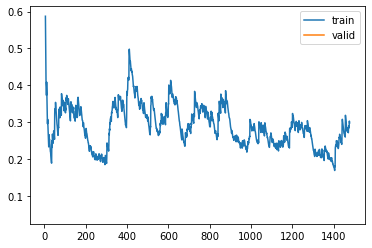

In [14]:
learn = vision_learner(
    dls=dataloaders,
    arch=resnet18,
    metrics=accuracy
)
learn.fine_tune(epochs=1)
learn.recorder.plot_loss()

## Task

We've given you a classifier (the `learn` object). It makes a few mistakes; can you find them?

Follow these steps:

1. Show one batch from each of the training and validation sets. (Find the `DataLoader` objects at `dataloaders.train` and `dataloaders.valid`; each of them has a `.show_batch()` method.)

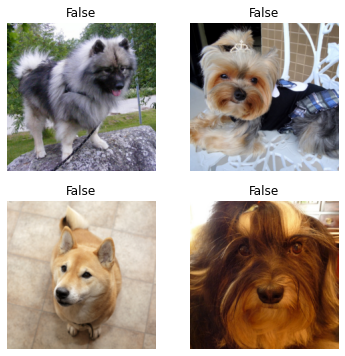

In [9]:
# your code here
dataloaders.train.show_batch()

In [ ]:
# your code here

In [11]:
import fastai
fastai.__version__

'2.7.4'

2. Compute the *accuracy* and *error rate* of this classifier on the validation set (`accuracy(interp.preds, interp.targs)`). Check that this number matches the last accuracy figure reported while training above. Multiply this by the number of images in the validation set to give the actual number of misclassified images.

*Hints*:

- You may need `WHATEVER.item()` to get a plain number instead of a `Tensor`.
- `DataLoader`s have a `.n` attribute that gives the number of images in them.

In [ ]:
# your code here

3. Plot the confusion matrix on the validation set (see chapter 2).

In [ ]:
# your code here

4. Compute the accuracy on the *training* set. (Since "dataset 0" is the training set and "dataset 1" is the validation set, we can use `interp_train = ClassificationInterpretation.from_learner(learn, ds_idx=0)`)

In [ ]:
interp_train = ClassificationInterpretation.from_learner(learn, ds_idx=0)
# your code here

5. Plot the top 12 losses in the validation set.

In [ ]:
interp.plot_top_losses(12)

## Analysis

1. **How many dogs in the validation set were misclassified as cats? Vice versa?**

X out of XX images were incorrectly labeled "cat".

Y out of YY images were incorrectly labeled "dog".

2. **If we had only looked at the accuracy on the training set, would we have *overestimated* or *underestimated* how well the classifier would have performed on the validation set? By how much?**

*your answer here*

3. Examine the top losses plot.
  1. Explain what the four things above each image mean.
  2. Explain why some correctly classified images appear in the "top losses".
  3. What is the relationship between "loss" and "probability"?

*your answer here*